In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.drop(columns=["adult_male","deck","alone"],inplace=True)            #droping un wanted columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


##### There are some null values in both catagorical and numerical values

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### First lets deal with null values in catagorical columns and then convert catorical into numerical columns because knn imputer will not accept catagorical values

### handling null values in catagorical columns

In [7]:
cat_null=[x for x in df.columns if df[x].isnull().sum()>=1 and df[x].dtypes=="O"]
cat_null

['embarked', 'embark_town']

In [8]:
for x in cat_null:
    print(x,":","{} %missing values".format(np.round(df[x].isnull().mean(),decimals=4)))  #total % of missing values

embarked : 0.0022 %missing values
embark_town : 0.0022 %missing values


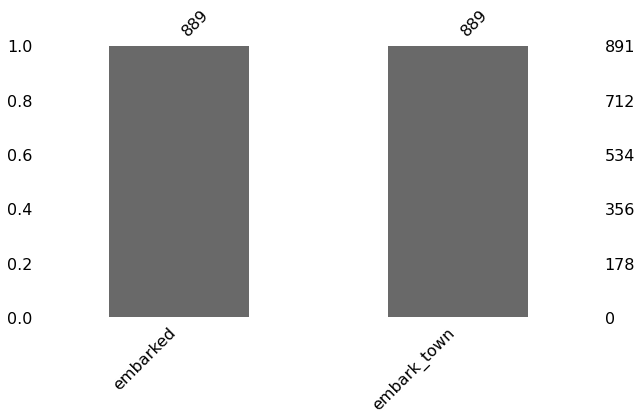

In [9]:
import missingno as msno
p=msno.bar(df[cat_null],figsize=(10,5))                                      #null value plot

##### Ther are only two missing values so we can replace missing values in that column with mode

In [10]:
for i in cat_null:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


### null values in numerical columns

In [12]:
nu_null=[x for x in df.columns if df[x].dtypes!="O" and df[x].isnull().sum()>=1]

In [13]:
for x in nu_null:
     print(x,":","{} %missing values".format(np.round(df[x].isnull().mean(),decimals=4)))  #total % of missing values

age : 0.1987 %missing values


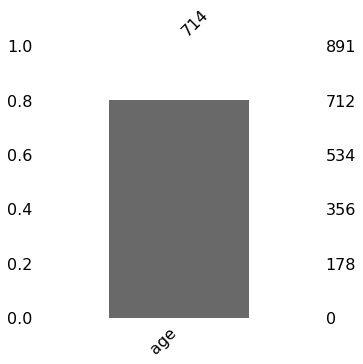

In [14]:
p=msno.bar(df[nu_null],figsize=(5,5))           

### one hot encoding 

In [15]:
df["sex"]=df["sex"].map({"male":0,"female":1})

In [16]:
df["class"]=df["class"].map({"Third":3,"First":1,"Second":2})

In [17]:
df["class"]=df["class"].astype("int")

In [18]:
cat=[x for x in df.columns if df[x].dtypes=="O" and x not in ["sex"]]
cat

['embarked', 'who', 'embark_town', 'alive']

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder=LabelEncoder()

In [21]:
for i in cat:
    df[i]=encoder.fit_transform(df[i])

In [22]:
df.info()                            # we canverted all the catagorical values intonumerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  embark_town  891 non-null    int32  
 11  alive        891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB


### standard scaler

In [23]:
x=df.iloc[0:,0:11]
y=df.iloc[0:,[11]]

In [24]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
df1=pd.DataFrame(scaling.fit_transform(x),columns=x.columns)

#### we scaled our feature because knn calculates distance to find nearet neighbor so if scale down our value the knn calculates distance fastly

### knn imputer 

In [25]:
from sklearn.impute import KNNImputer

In [26]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'embark_town', 'alive'],
      dtype='object')

In [27]:
imputer = KNNImputer(n_neighbors=5,add_indicator=True)

In [28]:
df_filled = pd.DataFrame(imputer.fit_transform(x),columns=['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'embark_town',"indicator"])
df_filled                                                          ## indicator column is used to indentifiey were the null value was present

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,embark_town,indicator
0,0.0,3.0,0.0,22.0,1.0,0.0,7.2500,2.0,3.0,1.0,2.0,0.0
1,1.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,2.0,0.0,0.0
2,1.0,3.0,1.0,26.0,0.0,0.0,7.9250,2.0,3.0,2.0,2.0,0.0
3,1.0,1.0,1.0,35.0,1.0,0.0,53.1000,2.0,1.0,2.0,2.0,0.0
4,0.0,3.0,0.0,35.0,0.0,0.0,8.0500,2.0,3.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,27.0,0.0,0.0,13.0000,2.0,2.0,1.0,2.0,0.0
887,1.0,1.0,1.0,19.0,0.0,0.0,30.0000,2.0,1.0,2.0,2.0,0.0
888,0.0,3.0,1.0,34.4,1.0,2.0,23.4500,2.0,3.0,2.0,2.0,1.0
889,1.0,1.0,0.0,26.0,0.0,0.0,30.0000,0.0,1.0,1.0,0.0,0.0


In [29]:
df_filled.isnull().sum()          

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
embark_town    0
indicator      0
dtype: int64